# Multi-Objective Optimizations 

Ở phần này, ta sẽ thử với nhiều tập dữ liệu có đặc điểm khác nhau & phát triển phương trình đánh giá performance hợp lý 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

## Ta sẽ quy về 1 objective, các trường hợp sẽ thử implements với greedy search

In [2]:
n = 600 # number of problems
m = 20 # problem types
k = 25 # students


In [3]:
R = np.random.randint(low=0,high=11,dtype='int32',size=[n,k])

In [4]:
# R là kết quả của k students với n problems
R.shape

(600, 25)

In [5]:
# Số bài mỗi dạng : Random bằng cách reo xúc xắc 20 mặt 300 lần. 

In [6]:
number_of_problems = np.random.multinomial(n, [1./m]*m)

In [7]:
number_of_problems

array([33, 19, 41, 32, 39, 33, 27, 36, 32, 29, 24, 30, 20, 32, 26, 24, 33,
       28, 34, 28])

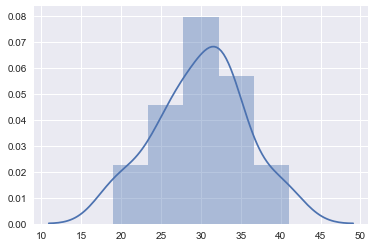

In [8]:
sns.distplot(number_of_problems)

In [9]:
# P : k*m là ma trận điểm số của k student cho m dạng bài 
P = np.zeros([k,m],dtype='float32') # chưa tính giá trị
P.shape

(25, 20)

In [10]:
# Tính tổng điểm của m problem type cho k student
start = 0
for i in range(m):
    quantity = number_of_problems[i]
    # print(quantity)
    P[:,i] = (R[start:start+quantity, : ].sum(axis=0))/(quantity*10) # Kết quả mỗi dạng max = 1
    start+=quantity

In [11]:
# Kết quả của students i = 5
print("Result of student i = 5 :")
print(P[5,:])
print("student i = 5 performed best at problems type #", np.argmax(P[5,:]),"with score = ", np.amax(P[5,:]) )

Result of student i = 5 :
[ 0.4969697   0.53684211  0.45365855  0.60312498  0.56153846  0.43030304
  0.49629629  0.52777779  0.45937499  0.55517244  0.41666666  0.54000002
  0.565       0.44999999  0.46153846  0.40000001  0.54848486  0.63928574
  0.5         0.47857141]
student i = 5 performed best at problems type # 17 with score =  0.639286


In [12]:
# Tìm problems type tốt nhất k student
Best_perform_distribution = np.zeros(k, dtype='int32') 

In [13]:
Best_perform_distribution = np.argmax(P, axis=1)
Best_perform_distribution

array([ 8, 19, 17,  1,  7, 17, 11, 17, 14,  0, 15,  1,  2,  4, 17, 12, 10,
        3,  3, 12,  8,  9,  1, 15,  7], dtype=int64)

(array([ 1.,  3.,  1.,  2.,  1.,  0.,  0.,  2.,  2.,  1.,  1.,  1.,  2.,
         0.,  1.,  2.,  0.,  4.,  0.]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
         17.5,  18.5]),
 <a list of 19 Patch objects>)

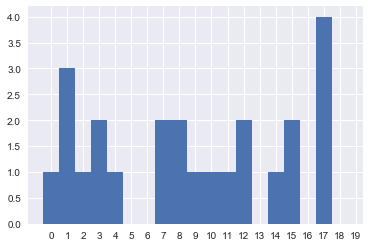

In [14]:
plt.xticks(range(20),range(20))
plt.hist(Best_perform_distribution, 
         bins=np.arange(20)-0.5)

[10  1 18 15 10 15 14 12  8 13  5 11 12  1 14  1 13  7 12  9 16 14 10 10 14]


(array([ 0.,  3.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  4.,  1.,  3.,
         2.,  4.,  2.,  1.,  0.,  1.]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
         17.5,  18.5]),
 <a list of 1 Patch objects>)

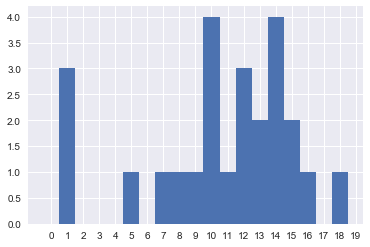

In [15]:
Worst_perform_distribution = np.argmin(P, axis=1)
print(Worst_perform_distribution)
plt.xticks(range(20),range(20))

plt.hist(Worst_perform_distribution, 
         bins=np.arange(20)-0.5, histtype='stepfilled')

In [16]:
P[0,:] # Performance of student index i = 0

array([ 0.40909091,  0.49473685,  0.49756098,  0.44062501,  0.45128205,
        0.57272726,  0.48148149,  0.40555555,  0.64999998,  0.54137933,
        0.38333333,  0.46000001,  0.47      ,  0.484375  ,  0.53846157,
        0.48750001,  0.42424244,  0.56785715,  0.50882351,  0.58214283], dtype=float32)

In [17]:
avg = np.mean(P, axis=0)

In [18]:
avg # Điểm số trung bình của tất cả sinh viên

array([ 0.50557578,  0.50315785,  0.50321943,  0.50700003,  0.51271796,
        0.49733341,  0.50118518,  0.50088888,  0.507375  ,  0.49489659,
        0.45633328,  0.49733329,  0.49339998,  0.49862498,  0.49446151,
        0.51433337,  0.50484842,  0.52242863,  0.49835289,  0.51185709], dtype=float32)

In [19]:
def mean_score(x):
    # input x : list [0...1...] where x_i = 1 if student i is on team
    return P[x,:].mean(axis=0)

In [20]:
mean_score([1,2,3])

array([ 0.50101012,  0.52807021,  0.5       ,  0.50312501,  0.52649575,
        0.5272727 ,  0.50246912,  0.5       ,  0.484375  ,  0.46781608,
        0.44722223,  0.52888888,  0.45166668,  0.50520831,  0.57179487,
        0.50972223,  0.4818182 ,  0.55952382,  0.4666667 ,  0.49761903], dtype=float32)

In [21]:
np.sum(P[[1,2,3],:],axis=0)/3 # ok

array([ 0.50101012,  0.52807021,  0.5       ,  0.50312501,  0.52649575,
        0.5272727 ,  0.50246912,  0.5       ,  0.484375  ,  0.46781608,
        0.44722223,  0.52888888,  0.45166668,  0.50520831,  0.57179487,
        0.50972223,  0.4818182 ,  0.55952382,  0.4666667 ,  0.49761903], dtype=float32)

In [22]:
np.sum(mean_score([1,2,3]) > avg)

8

In [23]:
mean_score([1,2,3]) > avg

array([False,  True, False, False,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False], dtype=bool)

In [24]:
def test_objective(x):
    # input x : list [0...1...] where x_i = 1 if student i is on team
    # decrease 1% of team score for each problem type that perform under average 
    mean = mean_score(x)
    under = np.sum(mean < avg) # no types which score is lower than average
    return np.sum(mean) * (100-under)/100 # reduce it

In [25]:
test_objective([1,2,3])

8.853473434448242

In [26]:
sum(mean_score([1,2,3]))

10.060764968395233

In [27]:
mean_score([1,2,3])

array([ 0.50101012,  0.52807021,  0.5       ,  0.50312501,  0.52649575,
        0.5272727 ,  0.50246912,  0.5       ,  0.484375  ,  0.46781608,
        0.44722223,  0.52888888,  0.45166668,  0.50520831,  0.57179487,
        0.50972223,  0.4818182 ,  0.55952382,  0.4666667 ,  0.49761903], dtype=float32)

In [28]:
team = []
means = []
news = []
for first in range(k-2):
    for(second) in range(first+1,k-1):
        for(last) in range(second+1,k):
            team.append([first,second,last])
            means.append(np.sum(mean_score([first,second,last])))
            news.append(test_objective([first,second,last]))

In [29]:
import pandas as pd

data = pd.DataFrame(
    {
        'Mean result' : means,
        'Mean result reduced' : news
    }
)



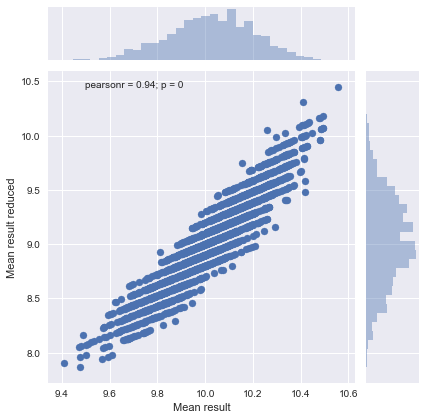

In [30]:
plt.figure(figsize = (16,5))

sns.jointplot(x='Mean result',y='Mean result reduced', data=data)

In [31]:
max_sum = means.index(max(means))
max_new = news.index(max(news))

In [32]:
best_objective_team = team[max_new]
best_old_team = team[max_sum]

In [33]:
print('Result of team ',best_old_team,' with highest mean score : ')
print(mean_score(best_old_team))
print('Number of problems type under avg : ', np.sum(mean_score(best_old_team) < avg))

Result of team  [11, 15, 22]  with highest mean score : 
[ 0.55454546  0.55789477  0.53577238  0.48854169  0.52564102  0.5333333
  0.52222222  0.51944447  0.54791665  0.5333333   0.48333332  0.50111109
  0.56166667  0.51249999  0.54615384  0.5333333   0.53232318  0.52500004
  0.51960784  0.52500004]
Number of problems type under avg :  1


In [34]:
print('Result of team ',best_objective_team,' with highest mean score : ')
print(mean_score(best_objective_team))
print('Number of problems type under avg : ', np.sum(mean_score(best_objective_team) < avg))

Result of team  [11, 15, 22]  with highest mean score : 
[ 0.55454546  0.55789477  0.53577238  0.48854169  0.52564102  0.5333333
  0.52222222  0.51944447  0.54791665  0.5333333   0.48333332  0.50111109
  0.56166667  0.51249999  0.54615384  0.5333333   0.53232318  0.52500004
  0.51960784  0.52500004]
Number of problems type under avg :  1


In [35]:
print('Compare two teams : ')
print(mean_score(best_objective_team) - mean_score(best_old_team))

Compare two teams : 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [36]:
# Test cosine similarity của 2 team so với E:
def cosine_sim(v1,v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2))

In [37]:
E = number_of_problems

In [38]:
print('Cosine similarity of best objective team : ',cosine_sim(mean_score(best_objective_team),E))

Cosine similarity of best objective team :  0.981048294994


In [39]:
print('Cosine similarity of best objective team : ',cosine_sim(mean_score(best_old_team),E))

Cosine similarity of best objective team :  0.981048294994
